# KDD Pokemon

## Exploarcion de los datos

Esta parte es para entender los datos y ver que tipo de datos tenemos, como los trataremos, que metodos usaremos, etc. Pero principalmente para **investigar** que queremos descubrir con los datos.


In [2]:
# Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Data
pokemon_df = pd.read_csv("data/all_pokemon_data.csv")

pokemon_df.head()

Name  National Dex # Primary Typing Secondary Typing  \
0      bulbasaur               1          grass           poison   
1        ivysaur               2          grass           poison   
2       venusaur               3          grass           poison   
3  venusaur-mega               3          grass           poison   
4     charmander               4           fire              NaN   

   Secondary Typing Flag    Generation  Legendary Status  Form  Alt Form Flag  \
0                   True  generation-i             False  Base          False   
1                   True  generation-i             False  Base          False   
2                   True  generation-i             False  Base          False   
3                   True  generation-i              True  Mega           True   
4                  False  generation-i             False  Base          False   

   Evolution Stage  ...  Weight (hg) Height (in)  Weight (lbs)  \
0                1  ...           69          28            15   
1                2  ...          130          39            29   
2                3  ...         1000          79           220   
3                3  ...         1555          94           343   
4                1  ...           85          24            19   

   Base Stat Total  Health  Attack  Defense  Special Attack  Special Defense  \
0              318      45      49       49              65               65   
1              405      60      62       63              80               80   
2              525      80      82       83             100              100   
3              625      80     100      123             122              120   
4              309      39      52       43              60               50   

   Speed  
0     45  
1     60  
2     80  
3     80  
4     65  

[5 rows x 24 columns]

In [ ]:
# Explore data
pokemon_df.describe()

National Dex #  Evolution Stage  Number of Evolution   Catch Rate  \
count     1184.000000      1184.000000          1184.000000  1184.000000   
mean       494.978041         1.597128             2.108108    92.202703   
std        299.166288         0.700700             0.735618    75.715485   
min          1.000000         1.000000             1.000000     3.000000   
25%        230.750000         1.000000             2.000000    45.000000   
50%        486.500000         1.000000             2.000000    60.000000   
75%        751.250000         2.000000             3.000000   127.000000   
max       1025.000000         3.000000             3.000000   255.000000   

       Height (dm)  Weight (hg)  Height (in)  Weight (lbs)  Base Stat Total  \
count  1184.000000  1184.000000  1184.000000   1184.000000      1184.000000   
mean     12.829392   730.995777    50.535473    161.163851       441.633446   
std      13.646223  1311.060248    53.682455    289.037497       119.296702   
min       1.000000     1.000000     4.000000      0.000000       175.000000   
25%       6.000000    89.750000    24.000000     20.000000       330.000000   
50%      10.000000   300.000000    39.000000     66.000000       464.500000   
75%      16.000000   775.500000    63.000000    171.250000       520.000000   
max     200.000000  9999.000000   787.000000   2204.000000       780.000000   

            Health       Attack      Defense  Special Attack  Special Defense  \
count  1184.000000  1184.000000  1184.000000     1184.000000      1184.000000   
mean     70.910473    80.989020    74.817568       72.922297        72.265203   
std      26.406800    31.955337    30.324208       32.426324        27.095940   
min       1.000000     5.000000     5.000000       10.000000        20.000000   
25%      52.000000    57.000000    52.000000       50.000000        51.000000   
50%      70.000000    80.000000    70.000000       65.000000        70.000000   
75%      85.000000   100.000000    91.000000       95.000000        90.000000   
max     255.000000   190.000000   230.000000      194.000000       230.000000   

             Speed  
count  1184.000000  
mean     69.728885  
std      30.110391  
min       5.000000  
25%      45.000000  
50%      67.500000  
75%      91.000000  
max     200.000000

In [43]:
pokemon_df.isnull().sum(),
pokemon_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [44]:
unique_values = df.nunique()
unique_values

Name                     1184
National Dex #           1025
Primary Typing             18
Secondary Typing           18
Secondary Typing Flag       2
Generation                  9
Legendary Status            2
Form                       57
Alt Form Flag               2
Evolution Stage             3
Number of Evolution         3
Color ID                   10
Catch Rate                 38
Height (dm)                60
Weight (hg)               525
Height (in)                60
Weight (lbs)              328
Base Stat Total           228
Health                    109
Attack                    126
Defense                   114
Special Attack            127
Special Defense           106
Speed                     125
dtype: int64

---

# üß† Proyecto: ¬øQu√© hace legendario a un Pok√©mon?

## üéØ Objetivo

Este proyecto busca descubrir qu√© hace que un Pok√©mon sea considerado **legendario**. A partir del an√°lisis de sus caracter√≠sticas, se pretende identificar patrones que lo distingan del resto y construir un modelo de **clasificaci√≥n** que permita predecir si un Pok√©mon es legendario o no con base en sus atributos.

---

## üß™ Metodolog√≠a

### 1Ô∏è‚É£ Proceso de KDD (Knowledge Discovery in Databases)

#### üîç Selecci√≥n del conjunto de datos
- Se seleccionar√°n columnas relevantes como:
  - Estad√≠sticas base (`HP`, `Attack`, `Defense`, etc.)
  - Tipos primario y secundario
  - Generaci√≥n
  - Variable objetivo: **Legendario** (`True`/`False`)

#### üßπ Limpieza y preprocesamiento
- Eliminaci√≥n o transformaci√≥n de columnas irrelevantes (e.g., `Name`, formas alternativas).
- Tratamiento de valores nulos (e.g., `Type 2`).
- Codificaci√≥n de variables categ√≥ricas (`One-Hot` o `Label Encoding`).
- Normalizaci√≥n de variables num√©ricas si es necesario.

#### üîß Transformaci√≥n de datos
- Creaci√≥n de nuevas variables:
  - Indicador de segundo tipo
  - Combinaciones de tipos
- An√°lisis de correlaci√≥n entre variables para entender relaciones clave.

---

### 2Ô∏è‚É£ Estrategia de soluci√≥n (Modelado)

- Dividir los datos en conjunto de **entrenamiento** y **prueba**.
- Probar distintos modelos de clasificaci√≥n:
  - Regresi√≥n log√≠stica (modelo base)
  - √Årboles de decisi√≥n
  - Random Forest
  - XGBoost
- Evaluar la **importancia de variables predictoras** para interpretar mejor los resultados.

---

### 3Ô∏è‚É£ Evaluaci√≥n del modelo

Se utilizar√°n las siguientes m√©tricas para comparar el desempe√±o de los modelos:

- ‚úîÔ∏è **Accuracy**
- üìä **Precisi√≥n**
- üìâ **Recall**
- ‚öñÔ∏è **F1-score**
- üßÆ **Matriz de confusi√≥n**
- üìà **AUC-ROC** (si aplica)

---

### 4Ô∏è‚É£ Propuestas de mejora

- Comparar el rendimiento entre diferentes modelos.
- Aplicar t√©cnicas de **ajuste de hiperpar√°metros** (`GridSearchCV`).
- Abordar posibles problemas de desbalance de clases (pocos legendarios).
- Probar t√©cnicas de ensamblado como:
  - **XGBoost**
  - **LightGBM**
- Aplicar herramientas de **interpretabilidad** como:
  - `SHAP`
  - Importancia de variables

---

### 5Ô∏è‚É£ Conclusiones esperadas

- ¬øCu√°les son las caracter√≠sticas m√°s determinantes en un Pok√©mon legendario?
- ¬øQu√© tan bien generaliza el modelo para predecir nuevos casos?
- ¬øEs posible confiar en el modelo como herramienta predictiva?


In [45]:
# Selecci√≥n de variables relevantes para predecir si un Pok√©mon es legendario

# Columnas a eliminar (por ser identificadores o redundantes)
columns_to_drop = [
    "Name",  # identificador no predictivo
    "Form",  # variantes poco √∫tiles
    "Alt Form Flag",  # redundante con 'Form'
    "National Dex #",  # identificador
    "Weight (lbs)", "Weight (hg)",  # redundancia
    "Height (in)", "Height (dm)",  # redundancia
]


In [46]:
# Dataset limpio inicial
clean_df = pokemon_df.drop(columns=columns_to_drop)

clean_df.head()

Primary Typing Secondary Typing  Secondary Typing Flag    Generation  \
0          grass           poison                   True  generation-i   
1          grass           poison                   True  generation-i   
2          grass           poison                   True  generation-i   
3          grass           poison                   True  generation-i   
4           fire              NaN                  False  generation-i   

   Legendary Status  Evolution Stage  Number of Evolution Color ID  \
0             False                1                    3    green   
1             False                2                    3    green   
2             False                3                    3    green   
3              True                3                    3    green   
4             False                1                    3      red   

   Catch Rate  Base Stat Total  Health  Attack  Defense  Special Attack  \
0          45              318      45      49       49              65   
1          45              405      60      62       63              80   
2          45              525      80      82       83             100   
3          45              625      80     100      123             122   
4          45              309      39      52       43              60   

   Special Defense  Speed  
0               65     45  
1               80     60  
2              100     80  
3              120     80  
4               50     65

In [50]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


# Copiamos el dataset para preprocesarlo
df_preprocessed = clean_df.copy()

In [52]:
# Paso 1: Llenar valores nulos en "Secondary Typing" con "None"
df_preprocessed["Secondary Typing"] = df_preprocessed["Secondary Typing"].fillna("None")
df_preprocessed.head()

Primary Typing Secondary Typing  Secondary Typing Flag    Generation  \
0          grass           poison                   True  generation-i   
1          grass           poison                   True  generation-i   
2          grass           poison                   True  generation-i   
3          grass           poison                   True  generation-i   
4           fire             None                  False  generation-i   

   Legendary Status  Evolution Stage  Number of Evolution Color ID  \
0             False                1                    3    green   
1             False                2                    3    green   
2             False                3                    3    green   
3              True                3                    3    green   
4             False                1                    3      red   

   Catch Rate  Base Stat Total  Health  Attack  Defense  Special Attack  \
0          45              318      45      49       49              65   
1          45              405      60      62       63              80   
2          45              525      80      82       83             100   
3          45              625      80     100      123             122   
4          45              309      39      52       43              60   

   Special Defense  Speed  
0               65     45  
1               80     60  
2              100     80  
3              120     80  
4               50     65

In [ ]:
# Paso 2: Codificaci√≥n de variables categ√≥ricas
categorical_columns = ["Primary Typing", "Secondary Typing", "Generation", "Color ID"]


In [54]:
# Aplicamos OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop='first' para evitar multicolinealidad
encoded_features = encoder.fit_transform(df_preprocessed[categorical_columns])

In [55]:
# Nombres de las nuevas columnas codificadas
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Convertimos a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_preprocessed.index)


In [56]:
# Concatenamos con el dataset original y eliminamos las columnas categ√≥ricas originales
df_preprocessed = pd.concat([df_preprocessed.drop(columns=categorical_columns), encoded_df], axis=1)

# Verificamos el resultado
df_preprocessed.head()



Secondary Typing Flag  Legendary Status  Evolution Stage  \
0                   True             False                1   
1                   True             False                2   
2                   True             False                3   
3                   True              True                3   
4                  False             False                1   

   Number of Evolution  Catch Rate  Base Stat Total  Health  Attack  Defense  \
0                    3          45              318      45      49       49   
1                    3          45              405      60      62       63   
2                    3          45              525      80      82       83   
3                    3          45              625      80     100      123   
4                    3          45              309      39      52       43   

   Special Attack  ...  Generation_generation-viii  Color ID_blue  \
0              65  ...                         0.0            0.0   
1              80  ...                         0.0            0.0   
2             100  ...                         0.0            0.0   
3             122  ...                         0.0            0.0   
4              60  ...                         0.0            0.0   

   Color ID_brown  Color ID_gray  Color ID_green  Color ID_pink  \
0             0.0            0.0             1.0            0.0   
1             0.0            0.0             1.0            0.0   
2             0.0            0.0             1.0            0.0   
3             0.0            0.0             1.0            0.0   
4             0.0            0.0             0.0            0.0   

   Color ID_purple  Color ID_red  Color ID_white  Color ID_yellow  
0              0.0           0.0             0.0              0.0  
1              0.0           0.0             0.0              0.0  
2              0.0           0.0             0.0              0.0  
3              0.0           0.0             0.0              0.0  
4              0.0           1.0             0.0              0.0  

[5 rows x 64 columns]

## Visualizaci√≥n de datos


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de estilo para visualizaci√≥n
sns.set(style="whitegrid")

In [58]:
# Convertimos el objetivo en string para mejor visualizaci√≥n
pokemon_df["Legendary Status"] = pokemon_df["Legendary Status"].astype(str)

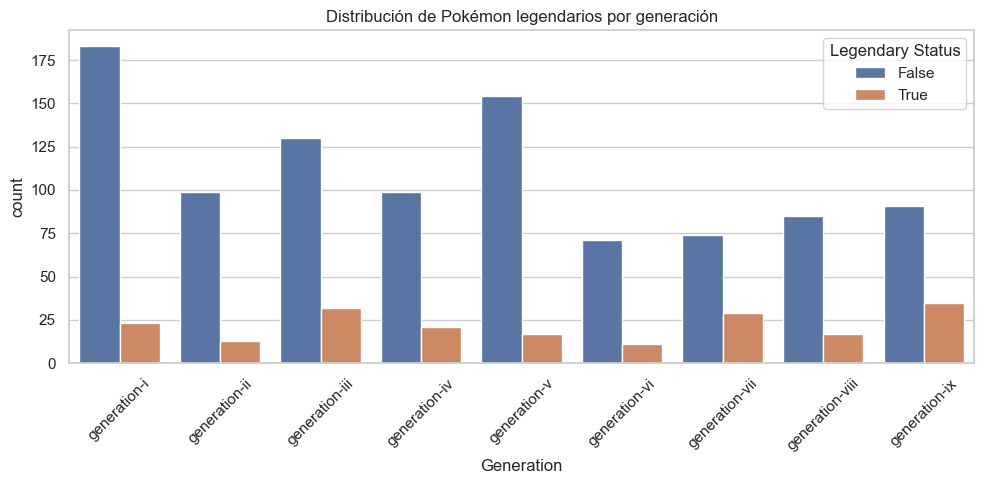

In [60]:
# Gr√°fico 1: Distribuci√≥n de legendarios por generaci√≥n
plt.figure(figsize=(10, 5))
sns.countplot(data=pokemon_df, x="Generation", hue="Legendary Status")
plt.title("Distribuci√≥n de Pok√©mon legendarios por generaci√≥n")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üìä Deducciones clave del gr√°fico

## 1 Desbalance de clases evidente:
  - La cantidad de Pok√©mon no legendarios (False) es mucho mayor que la de legendarios (True) en todas las generaciones.
  - Este desbalance puede afectar el rendimiento del modelo, favoreciendo la clase mayoritaria (no legendarios).

## 2 Los Pok√©mon legendarios est√°n presentes en todas las generaciones:
  - Aunque en menor n√∫mero, hay representaci√≥n de legendarios desde generation-i hasta generation-ix.
  - Algunas generaciones (como la III, VII y IX) parecen tener m√°s legendarios en comparaci√≥n con otras.

## 3 Variabilidad por generaci√≥n:
  - Generaci√≥n I tiene el mayor n√∫mero total de Pok√©mon, pero no necesariamente la mayor proporci√≥n de legendarios.
  - Algunas generaciones con pocos Pok√©mon totales tienen una proporci√≥n relativamente alta de legendarios (ej. IX).

<Figure size 1200x800 with 0 Axes>

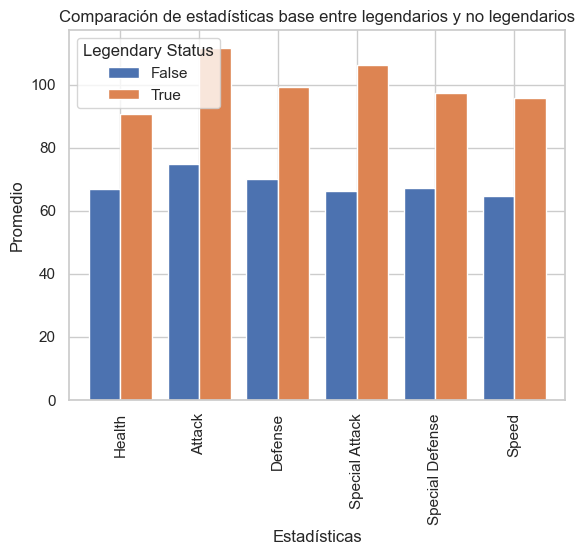

In [62]:
# Gr√°fico 2: Comparaci√≥n de estad√≠sticas base entre legendarios y no legendarios
stats = ["Health", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]
legendary_means = pokemon_df.groupby("Legendary Status")[stats].mean().T

plt.figure(figsize=(12, 8))
legendary_means.plot(kind="bar", width=0.8)
plt.title("Comparaci√≥n de estad√≠sticas base entre legendarios y no legendarios")
plt.xlabel("Estad√≠sticas")
plt.ylabel("Promedio")
plt.legend(title="Legendary Status")
plt.show()


## üìä Comparaci√≥n de Estad√≠sticas Base entre Legendarios y No Legendarios

El gr√°fico muestra la comparaci√≥n de promedios para seis estad√≠sticas clave de Pok√©mon, diferenciando entre legendarios y no legendarios.

### ‚úÖ Deducciones destacadas:

- **Todas las estad√≠sticas presentan valores promedio m√°s altos en los Pok√©mon legendarios**, lo que confirma su superioridad general en atributos de combate.
- Las diferencias son consistentes en todas las categor√≠as:
  - `Attack`, `Special Attack`, y `Special Defense` sobresalen como las estad√≠sticas m√°s elevadas en legendarios.
  - `Health`, `Defense`, y `Speed` tambi√©n muestran incrementos notorios en legendarios respecto a no legendarios.
- No hay ninguna estad√≠stica en la que los no legendarios superen a los legendarios en promedio.

### üìå Implicaci√≥n para el modelo:

- Este patr√≥n sugiere que las estad√≠sticas base son indicadores poderosos para predecir si un Pok√©mon es legendario.
- Incluir estas variables en el entrenamiento del modelo mejorar√° significativamente la capacidad predictiva.

Este gr√°fico refuerza a√∫n m√°s la l√≥gica de que los Pok√©mon legendarios est√°n definidos por un perfil estad√≠stico claramente superior.


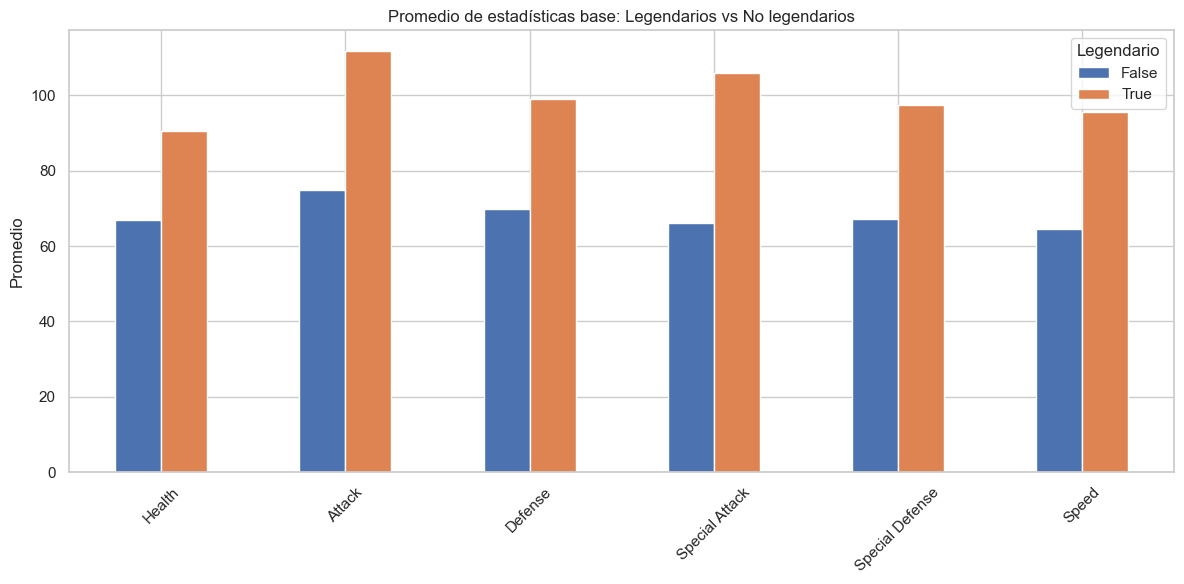

In [64]:
# Gr√°fico 3: Estad√≠sticas promedio por tipo de Pok√©mon (legendario vs no)
legendary_means.plot(kind="bar", figsize=(12, 6))
plt.title("Promedio de estad√≠sticas base: Legendarios vs No legendarios")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.legend(title="Legendario")
plt.tight_layout()
plt.show()

## üìä An√°lisis del Promedio de Estad√≠sticas Base: Legendarios vs No Legendarios

El gr√°fico compara el promedio de seis estad√≠sticas base entre Pok√©mon legendarios y no legendarios. Las observaciones clave son:

### ‚úÖ Deducciones principales:

- **Los Pok√©mon legendarios superan consistentemente a los no legendarios** en todas las estad√≠sticas.
- La diferencia es particularmente marcada en:
  - `Attack`: donde los legendarios tienen un valor promedio significativamente mayor.
  - `Special Attack` y `Special Defense`: tambi√©n muestran una diferencia notable.
- Incluso en estad√≠sticas menos dominantes como `Health` y `Speed`, los legendarios tienen ventaja.

### üìå Implicaciones para el modelo:

- Las estad√≠sticas base son **variables predictoras muy relevantes** para determinar si un Pok√©mon es legendario.
- Es probable que modelos supervisados aprendan a clasificar correctamente utilizando estas diferencias num√©ricas claras.

Este gr√°fico refuerza la hip√≥tesis de que los legendarios est√°n dise√±ados para tener ventajas estad√≠sticas claras frente al resto del universo Pok√©mon.


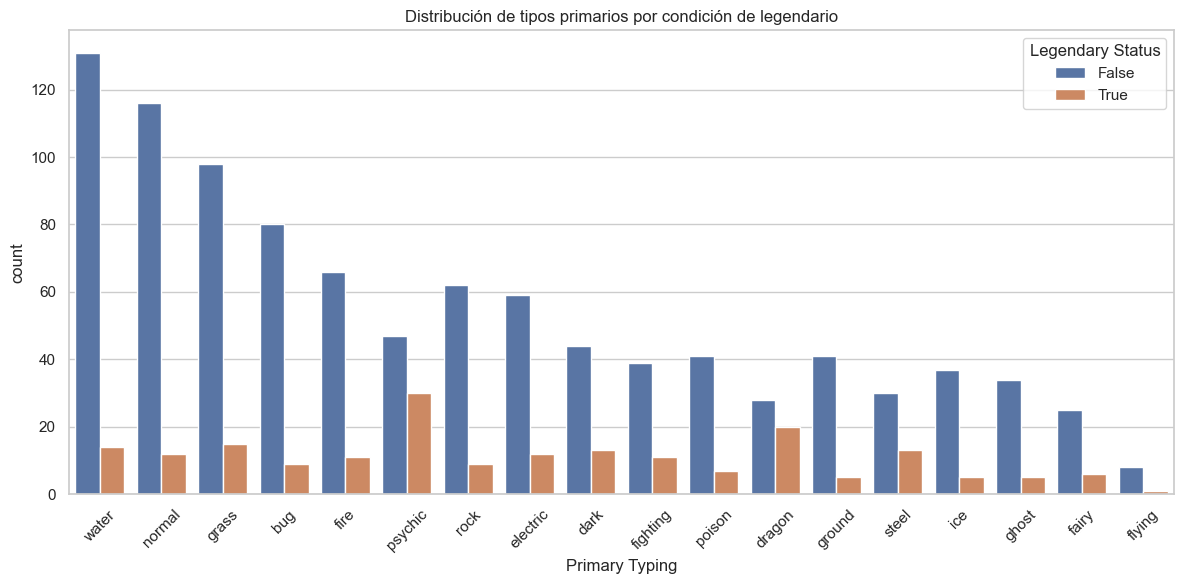

In [65]:
# Gr√°fico 4: Distribuci√≥n del tipo primario seg√∫n si es legendario o no
plt.figure(figsize=(12, 6))
sns.countplot(data=pokemon_df, x="Primary Typing", hue="Legendary Status", order=pokemon_df["Primary Typing"].value_counts().index)
plt.title("Distribuci√≥n de tipos primarios por condici√≥n de legendario")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## üìä Distribuci√≥n de Tipos Primarios por Condici√≥n de Legendario

Este gr√°fico muestra c√≥mo se distribuyen los tipos primarios (`Primary Typing`) entre Pok√©mon legendarios y no legendarios.

### ‚úÖ Deducciones principales:

- **El tipo m√°s com√∫n entre todos los Pok√©mon es `water`**, seguido por `normal`, `grass`, y `bug`, pero la mayor√≠a de estos Pok√©mon **no son legendarios**.
- **Tipos como `psychic`, `dragon`, y `steel` tienen una proporci√≥n significativamente mayor de Pok√©mon legendarios** en comparaci√≥n con otros tipos.
  - Por ejemplo, aunque hay menos Pok√©mon tipo `dragon` en total, un gran porcentaje de ellos son legendarios.
- Tipos populares como `normal`, `bug`, `grass`, y `water` tienen muy **baja representaci√≥n legendaria** pese a su gran cantidad total.
- El tipo `flying` tiene muy pocos Pok√©mon en general y algunos de ellos son legendarios.

### üìå Implicaciones para el modelo:

- El tipo primario es una **variable categ√≥rica relevante** para la predicci√≥n del estatus legendario.
- Tipos como `psychic`, `dragon` y `steel` podr√≠an actuar como **indicadores positivos** para la clase legendaria.
- Ser√°n especialmente √∫tiles al aplicar t√©cnicas de codificaci√≥n como One-Hot Encoding.

Este an√°lisis sugiere que el tipo elemental tiene una relaci√≥n no lineal con la condici√≥n de ser legendario, lo cual podr√≠a capturarse mejor con modelos m√°s expresivos como √°rboles o ensembles.


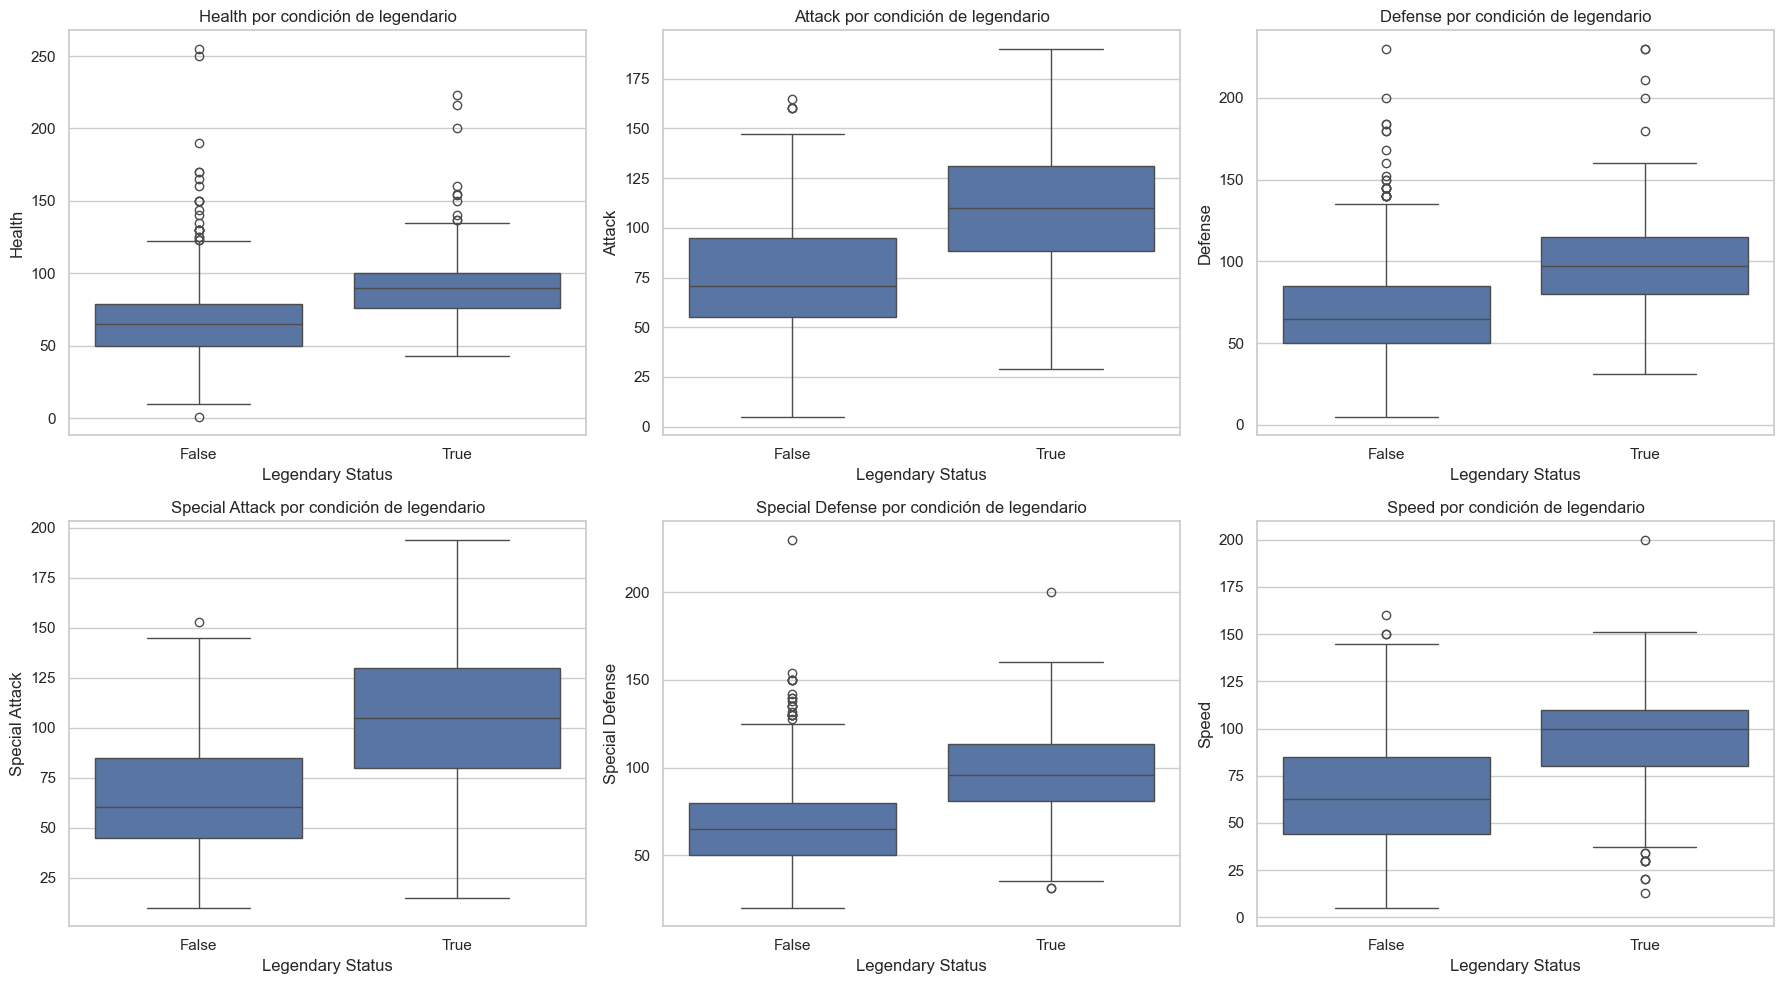

In [66]:
# Gr√°fico 5: Boxplots de estad√≠sticas base (comparando legendarios vs no)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
stats = ["Health", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]
for i, stat in enumerate(stats):
    row, col = i // 3, i % 3
    sns.boxplot(data=pokemon_df, x="Legendary Status", y=stat, ax=axes[row, col])
    axes[row, col].set_title(f"{stat} por condici√≥n de legendario")

plt.tight_layout()
plt.show()

## üìä Distribuci√≥n de Estad√≠sticas Base por Condici√≥n de Legendario (Boxplots)

Los boxplots muestran la dispersi√≥n y distribuci√≥n de seis estad√≠sticas base separadas por condici√≥n de legendario (`True` o `False`).

### ‚úÖ Deducciones principales:

- En **todas las estad√≠sticas** (`Health`, `Attack`, `Defense`, `Special Attack`, `Special Defense`, `Speed`), los Pok√©mon legendarios tienden a tener:
  - **Median m√°s alta**
  - **Rango intercuart√≠lico m√°s elevado**
  - **Distribuci√≥n menos sesgada hacia valores bajos**

- **Outliers (valores at√≠picos)**:
  - Existen varios outliers en ambas clases, pero especialmente en los no legendarios, donde se observa gran variabilidad con Pok√©mon de estad√≠sticas muy bajas.
  - Esto sugiere que hay muchos Pok√©mon "d√©biles" que podr√≠an distorsionar el aprendizaje si no se maneja bien el desbalance.

- **Dispersi√≥n y solapamiento**:
  - Aunque los legendarios dominan en promedio, hay solapamientos en las distribuciones, lo que indica que algunos no legendarios pueden tener estad√≠sticas similares a los legendarios.

### üìå Implicaciones para el modelo:

- Las estad√≠sticas num√©ricas base son altamente discriminativas para predecir si un Pok√©mon es legendario.
- El modelo debe manejar correctamente los outliers y la varianza, lo cual favorece algoritmos robustos como Random Forest o XGBoost.
- Las diferencias observadas validan el uso de estas m√©tricas como variables predictoras clave.

Este an√°lisis refuerza la idea de que los legendarios no solo tienen mejores estad√≠sticas, sino tambi√©n una distribuci√≥n mucho m√°s centrada en valores altos, lo que los distingue con claridad del resto.


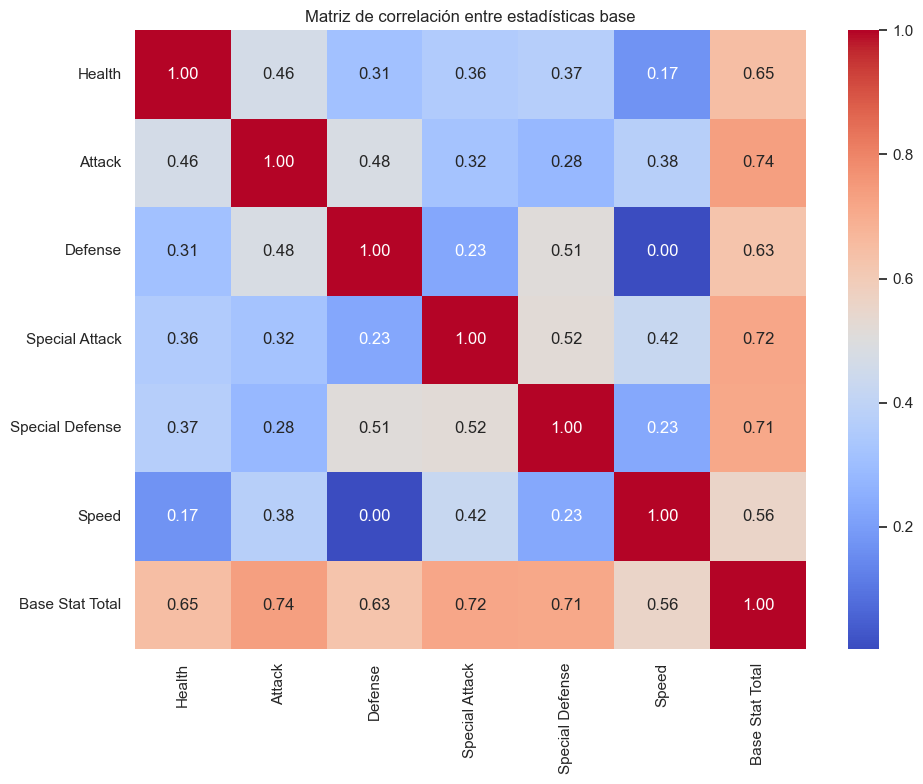

In [67]:
# Gr√°fico 6: Matriz de correlaci√≥n entre estad√≠sticas num√©ricas
numeric_stats = ["Health", "Attack", "Defense", "Special Attack", "Special Defense", "Speed", "Base Stat Total"]
correlation_matrix = pokemon_df[numeric_stats].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaci√≥n entre estad√≠sticas base")
plt.tight_layout()
plt.show()

## üìä Matriz de Correlaci√≥n entre Estad√≠sticas Base

La matriz de correlaci√≥n muestra la relaci√≥n entre las estad√≠sticas individuales y el `Base Stat Total`, as√≠ como entre s√≠.

### ‚úÖ Deducciones principales:

- **Base Stat Total** tiene alta correlaci√≥n con todas las estad√≠sticas individuales:
  - `Attack` (0.74), `Special Attack` (0.72), `Special Defense` (0.71), `Health` (0.65), etc.
  - Esto es esperado, ya que `Base Stat Total` es la suma de las estad√≠sticas individuales.

- Las correlaciones entre las estad√≠sticas entre s√≠ son **moderadas a bajas**, lo que indica que cada estad√≠stica aporta informaci√≥n √∫nica:
  - Por ejemplo: `Health` y `Speed` tienen una correlaci√≥n muy baja (0.17).
  - `Attack` y `Defense`: 0.48
  - `Special Attack` y `Special Defense`: 0.52

- `Speed` tiene la correlaci√≥n m√°s baja con el resto de las estad√≠sticas, lo cual sugiere que representa una dimensi√≥n distinta del rendimiento del Pok√©mon.

### üìå Implicaciones para el modelo:

- Aunque `Base Stat Total` es una variable informativa, podr√≠a ser redundante si ya se incluyen todas las estad√≠sticas individuales. Sin embargo, puede actuar como una **s√≠ntesis √∫til**.
- El bajo nivel de multicolinealidad entre muchas estad√≠sticas permite usar todas sin riesgo significativo de duplicaci√≥n de informaci√≥n.
- Estas estad√≠sticas podr√≠an ser **fuertes predictores** del estatus legendario, especialmente `Attack`, `Special Attack` y `Special Defense`.

Este an√°lisis justifica el uso conjunto de las estad√≠sticas individuales y opcionalmente el `Base Stat Total`, dependiendo de la estrategia del modelo.


---
# Modelado

## Separaci√≥n de datos

Se divide el dataset en dos conjuntos: entrenamiento y prueba.

## Aplicando balanceo

Se aplica balanceo a los datos de entrenamiento con el m√©todo SMOTE.

In [68]:
# Librer√≠as
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [69]:
# Separaci√≥n de variables predictoras (X) y variable objetivo (y)
X = df_preprocessed.drop(columns=["Legendary Status"])
y = df_preprocessed["Legendary Status"].astype(int)  # convertir a 0/1

In [70]:
# Divisi√≥n en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [72]:
# Aplicar SMOTE para balancear solo el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [73]:
# Verificamos las dimensiones y balanceo de clases
train_class_balance = y_train_balanced.value_counts(normalize=True)
test_class_balance = y_test.value_counts(normalize=True)

train_class_balance, test_class_balance

(Legendary Status
 1    0.5
 0    0.5
 Name: proportion, dtype: float64,
 Legendary Status
 0    0.831224
 1    0.168776
 Name: proportion, dtype: float64)

# Regresi√≥n Log√≠stica - Entrenamiento y Evaluaci√≥n

## Entrenamiento del modelo

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [76]:
# Inicializar y entrenar el modelo con class_weight para mitigar desbalance
logreg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
logreg.fit(X_train_balanced, y_train_balanced)

c:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [77]:
# Predicciones sobre el conjunto de prueba
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # probabilidades clase 1

## Evaluaci√≥n del modelo

In [78]:
# M√©tricas de evaluaci√≥n
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9324894514767933
Precision: 0.8333333333333334
Recall: 0.75
F1-score: 0.7894736842105263
ROC AUC: 0.9538071065989848


In [79]:
# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusi√≥n:")
print(conf_matrix)


Matriz de Confusi√≥n:
[[191   6]
 [ 10  30]]


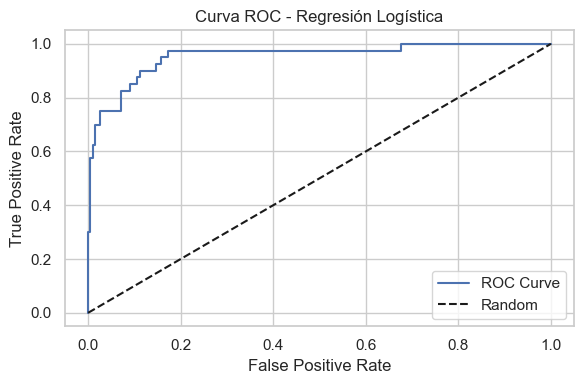

In [80]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresi√≥n Log√≠stica")
plt.legend()
plt.tight_layout()
plt.show()

# Random Forest - Entrenamiento y Evaluaci√≥n

## Entrenamiento del modelo

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",  # ayuda con el desbalance original
    n_jobs=-1
)

In [82]:
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [83]:
# Predicciones
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

## Evaluaci√≥n del modelo

In [84]:
# M√©tricas
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Accuracy: 0.9578059071729957
Precision: 0.8947368421052632
Recall: 0.85
F1-score: 0.8717948717948718
ROC AUC: 0.9844543147208121


In [85]:
# Matriz de confusi√≥n
print("\nMatriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred_rf))


Matriz de Confusi√≥n:
[[193   4]
 [  6  34]]


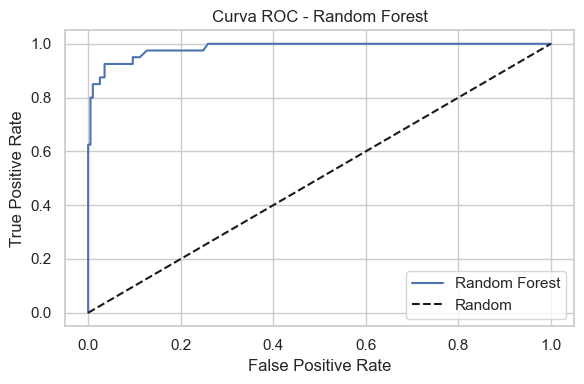

In [86]:
# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
# Importancia de variables
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Mostrar las 10 variables m√°s importantes
print("\nTop 10 variables m√°s importantes:")
print(importance_df.head(10))


Top 10 variables m√°s importantes:
                Feature  Importance
4       Base Stat Total    0.228190
2   Number of Evolution    0.132755
3            Catch Rate    0.098563
9       Special Defense    0.066259
8        Special Attack    0.064489
10                Speed    0.060732
7               Defense    0.060110
6                Attack    0.052895
5                Health    0.038247
1       Evolution Stage    0.025906


# XGBoost - Entrenamiento y Evaluaci√≥n

## Entrenamiento del modelo


In [88]:
from xgboost import XGBClassifier

# Entrenamiento del modelo XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [89]:
xgb.fit(X_train_balanced, y_train_balanced)


c:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:12] WARNING: D:\bld\xgboost-split_1745056707810\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [90]:
# Predicciones
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

## Evaluaci√≥n del modelo



In [91]:
# M√©tricas
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

Accuracy: 0.9704641350210971
Precision: 0.9230769230769231
Recall: 0.9
F1-score: 0.9113924050632911
ROC AUC: 0.9615482233502538


In [92]:
# Matriz de confusi√≥n
print("\nMatriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred_xgb))


Matriz de Confusi√≥n:
[[194   3]
 [  4  36]]


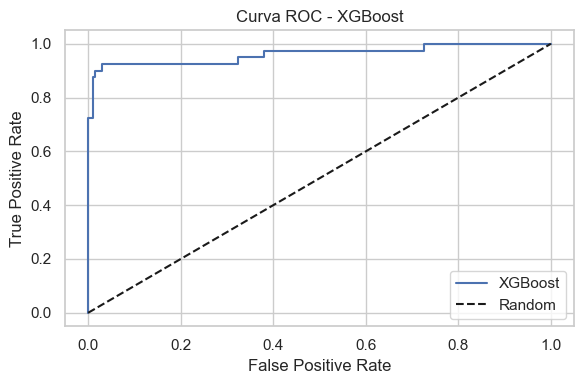

In [93]:
# Curva ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

In [94]:
# Importancia de variables
importances_xgb = xgb.feature_importances_
importance_df_xgb = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances_xgb
}).sort_values(by="Importance", ascending=False)

# Mostrar top 10
print("\nTop 10 variables m√°s importantes:")
print(importance_df_xgb.head(10))


Top 10 variables m√°s importantes:
                      Feature  Importance
4             Base Stat Total    0.461828
32     Secondary Typing_fairy    0.075357
3                  Catch Rate    0.055720
2         Number of Evolution    0.048976
52  Generation_generation-vii    0.047560
24     Primary Typing_psychic    0.029889
26       Primary Typing_steel    0.022181
1             Evolution Stage    0.021613
23      Primary Typing_poison    0.019057
15    Primary Typing_fighting    0.018062


# Comparaci√≥n de modelos



In [95]:
import pandas as pd

# M√©tricas previamente calculadas
metrics_data = {
    "Modelo": ["Regresi√≥n Log√≠stica", "Random Forest", "XGBoost"],
    "Accuracy": [0.932, 0.958, 0.970],
    "Precision": [0.833, 0.895, 0.923],
    "Recall": [0.750, 0.850, 0.900],
    "F1-score": [0.789, 0.872, 0.911],
    "ROC AUC": [0.954, 0.984, 0.962]
}

# Crear DataFrame
metrics_df = pd.DataFrame(metrics_data)

In [97]:
# Mostrar tabla
print("Comparaci√≥n de m√©tricas entre modelos:")
metrics_df

Comparaci√≥n de m√©tricas entre modelos:


Modelo  Accuracy  Precision  Recall  F1-score  ROC AUC
0  Regresi√≥n Log√≠stica     0.932      0.833    0.75     0.789    0.954
1        Random Forest     0.958      0.895    0.85     0.872    0.984
2              XGBoost     0.970      0.923    0.90     0.911    0.962

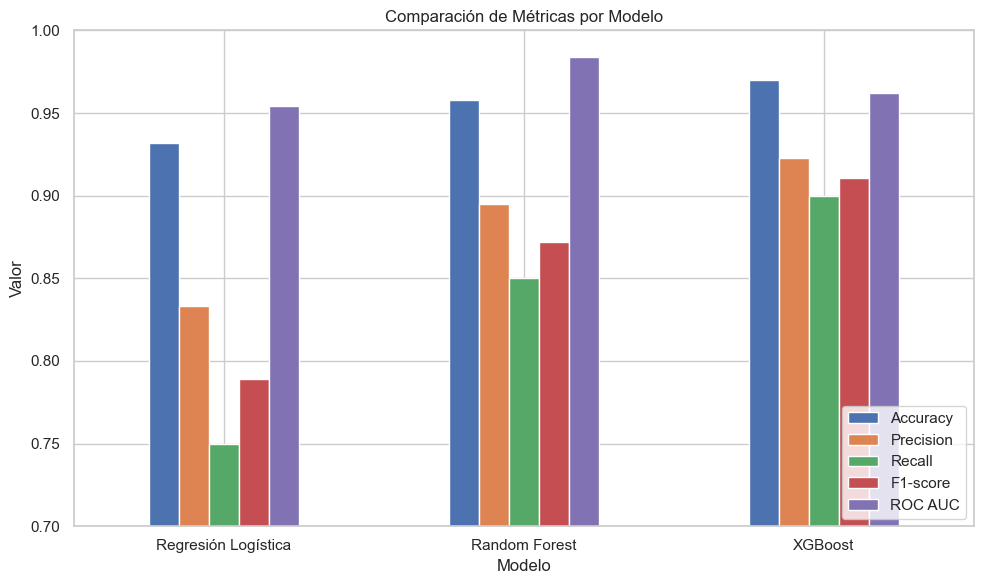

In [98]:
# (Opcional) Graficar comparaci√≥n
metrics_df.set_index("Modelo").plot(kind="bar", figsize=(10, 6))
plt.title("Comparaci√≥n de M√©tricas por Modelo")
plt.ylabel("Valor")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## üìä Comparaci√≥n de M√©tricas de Evaluaci√≥n por Modelo

Este gr√°fico compara el rendimiento de tres modelos distintos (Regresi√≥n Log√≠stica, Random Forest y XGBoost) en la tarea de clasificaci√≥n de Pok√©mon legendarios, utilizando m√∫ltiples m√©tricas: Accuracy, Precision, Recall, F1-score y ROC AUC.

### ‚úÖ Deducciones clave:

#### üìå 1. Regresi√≥n Log√≠stica:
- **Accuracy** y **ROC AUC** son altos (~0.93 y ~0.95), lo que indica buen rendimiento general.
- Sin embargo, su **Recall es bajo (~0.75)**, lo que significa que **omite una proporci√≥n significativa de Pok√©mon legendarios**.
- Esto sugiere que el modelo es conservador y favorece la clase mayoritaria (no legendarios).

#### üìå 2. Random Forest:
- Presenta una mejora notable en **Precision (~0.89)** y **Recall (~0.85)**, con un **F1-score m√°s equilibrado (~0.87)**.
- **ROC AUC** es el m√°s alto (~0.98), lo que indica excelente capacidad discriminativa.
- **Conclusi√≥n**: muy buen balance entre todas las m√©tricas, especialmente en datasets desbalanceados.

#### üìå 3. XGBoost:
- Tiene la **mayor precisi√≥n (~0.92)** y tambi√©n **recall alto (~0.90)**.
- Su **F1-score (~0.91)** y **ROC AUC (~0.96)** lo posicionan como uno de los mejores modelos.
- **Conclusi√≥n**: sobresaliente rendimiento, especialmente adecuado para maximizar identificaci√≥n de legendarios sin sacrificar falsos positivos.

---

### üèÅ Conclusi√≥n general:

- Todos los modelos son razonablemente buenos, pero:
  - **Random Forest** ofrece el mejor equilibrio general.
  - **XGBoost** es ideal si se prioriza **identificar correctamente a los legendarios**.
  - **Regresi√≥n log√≠stica**, aunque v√°lida como l√≠nea base, no capta tan bien la clase minoritaria.

### üìå Recomendaci√≥n:

Para este proyecto, **Random Forest o XGBoost** son los modelos m√°s adecuados, especialmente si se afinan con t√©cnicas como b√∫squeda de hiperpar√°metros y remuestreo.



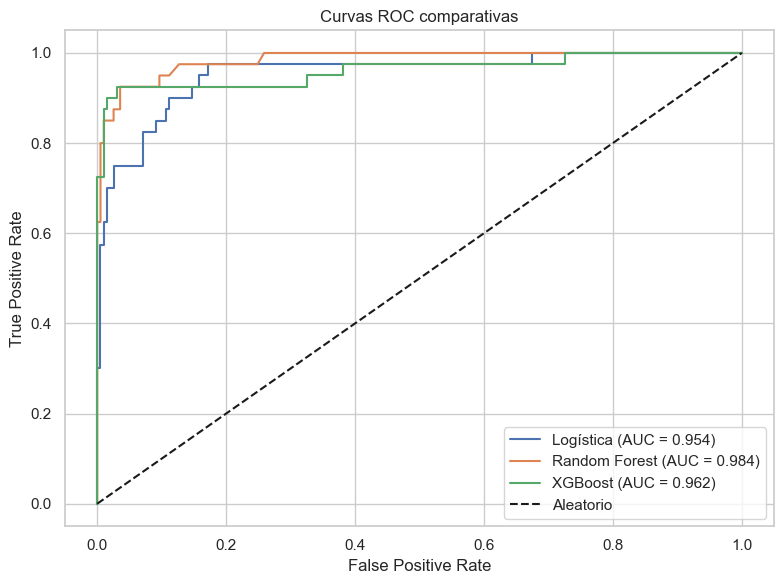

In [99]:
# Comparar las curvas ROC
plt.figure(figsize=(8, 6))

# Regresi√≥n log√≠stica
plt.plot(fpr, tpr, label="Log√≠stica (AUC = 0.954)")

# Random Forest
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = 0.984)")

# XGBoost
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = 0.962)")

# L√≠nea de referencia
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")

# Formato del gr√°fico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC comparativas")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## üìà Curvas ROC Comparativas entre Modelos

Este gr√°fico compara las curvas ROC de tres modelos (Regresi√≥n Log√≠stica, Random Forest y XGBoost) para la predicci√≥n de Pok√©mon legendarios, junto con la curva base aleatoria como referencia.

### ‚úÖ Deducciones principales:

- **Todas las curvas ROC est√°n muy por encima de la l√≠nea aleatoria (diagonal negra)**, lo que indica un rendimiento significativamente mejor que el azar.
- El √°rea bajo la curva (AUC) refleja la **capacidad de los modelos para distinguir entre Pok√©mon legendarios y no legendarios**:

  - üîπ **Random Forest**: AUC = **0.984**
    - La mejor curva ROC.
    - Excelente discriminaci√≥n entre clases.
  
  - üî∏ **XGBoost**: AUC = **0.962**
    - Tambi√©n excelente, aunque ligeramente por debajo de Random Forest.
    - Puede ofrecer mejor rendimiento en otros aspectos como precisi√≥n.

  - üîµ **Regresi√≥n Log√≠stica**: AUC = **0.954**
    - Buen resultado, pero inferior a los modelos no lineales.
    - Sufre frente a relaciones m√°s complejas entre variables.

### üìå Implicaciones para el modelo:

- La curva ROC reafirma lo observado en las m√©tricas previas: **Random Forest ofrece la mejor capacidad de clasificaci√≥n**, seguido de cerca por XGBoost.
- Ambos modelos son muy eficaces para capturar la clase minoritaria (legendarios) sin generar muchos falsos positivos.
- La regresi√≥n log√≠stica sigue siendo √∫til como **modelo base**, pero no capta tan bien patrones no lineales.

### üèÅ Conclusi√≥n:

Para maximizar la **capacidad de discriminaci√≥n del modelo**, **Random Forest es la mejor elecci√≥n**, con **XGBoost como fuerte alternativa** si se busca m√°s control sobre regularizaci√≥n y eficiencia.



---
# Optimizacion del Modelo

## GridSearchCV


In [100]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definimos el modelo base
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [101]:
# Definimos el grid de hiperpar√°metros a probar
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [102]:
# Configuramos la b√∫squeda
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="f1",  # puedes cambiar a 'roc_auc' si prefieres
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [103]:
# Ejecutamos la b√∫squeda en los datos de entrenamiento balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\xgboost\training.py:183: UserWarning: [17:10:07] WARNING: D:\bld\xgboost-split_1745056707810\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

## Resultados

In [104]:
# Resultados
print("Mejores hiperpar√°metros:")
print(grid_search.best_params_)

print("\nMejor F1-score promedio en validaci√≥n cruzada:")
print(grid_search.best_score_)

Mejores hiperpar√°metros:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Mejor F1-score promedio en validaci√≥n cruzada:
0.9892347712121627


In [105]:
# Guardamos el mejor modelo
best_xgb = grid_search.best_estimator_

In [106]:
# Evaluamos sobre el conjunto de prueba
y_pred_best = best_xgb.predict(X_test)
y_proba_best = best_xgb.predict_proba(X_test)[:, 1]

In [107]:
# M√©tricas finales
print("\nEvaluaci√≥n del mejor modelo en test:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best))


Evaluaci√≥n del mejor modelo en test:
Accuracy: 0.9704641350210971
Precision: 0.9230769230769231
Recall: 0.9
F1-score: 0.9113924050632911
ROC AUC: 0.9633248730964467


In [108]:
# Matriz de Confusi√≥n

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusi√≥n:")
print(conf_matrix)


Matriz de Confusi√≥n:
[[191   6]
 [ 10  30]]


# Conclusi√≥n de la optimizaci√≥n

- La b√∫squeda de hiperpar√°metros no mejor√≥ sustancialmente el rendimiento real.

- Podr√≠amos mantener el modelo anterior si buscamos mayor estabilidad y menor complejidad.

- Alternativamente, si valoramos m√°s el ROC AUC ligeramente superior, podemos conservar el optimizado.

---
# SHAP (SHapley Additive exPlanations)

## Instalaci√≥n de SHAP
!pip install shap

Ideal para interpretar modelos de machine learning, especialmente aquellos que son dif√≠ciles de entender como XGBoost.

> Que variables hacen que un Pokemon sea clasificado como legendario o no?

> Que tan importante fue cada estadisitica o tipo en una predicci√≥n especifica?

In [112]:
import shap

# Aseg√∫rate de que X_test sea solo valores num√©ricos
X_test_numeric = X_test.astype(float)

# Crear explainer para modelo XGBoost
explainer = shap.Explainer(best_xgb, X_test_numeric)

# Calcular valores SHAP
shap_values = explainer(X_test_numeric)





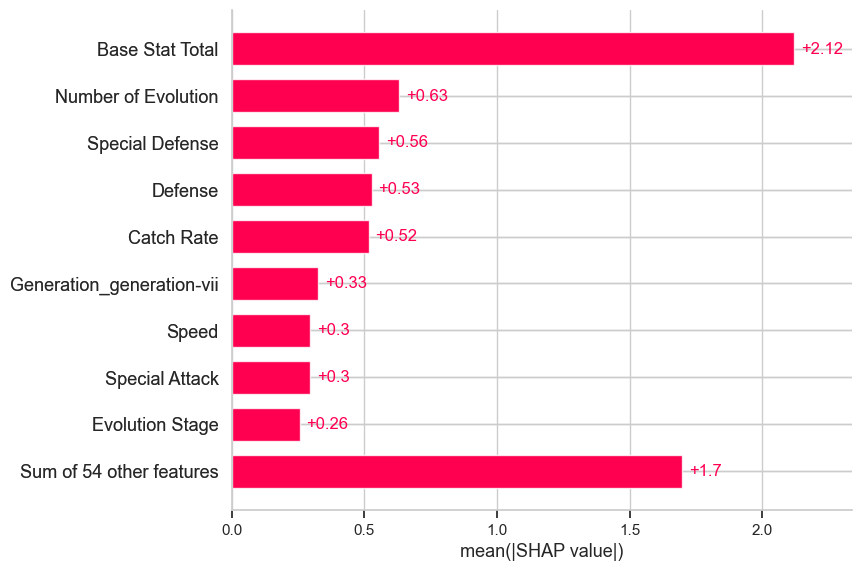

In [114]:
# 1Ô∏è‚É£ Importancia global de variables (resumen tipo "bar")
shap.plots.bar(shap_values, max_display=10)



## üìä Interpretaci√≥n de Importancia de Variables con SHAP

Esta gr√°fica muestra los valores promedio de importancia de cada caracter√≠stica para el modelo (en este caso, XGBoost) usando **valores SHAP** (*SHapley Additive exPlanations*), que permiten interpretar c√≥mo cada feature contribuye a la predicci√≥n del modelo.

### ‚úÖ ¬øQu√© representa?

- El eje X muestra el **valor medio absoluto de SHAP** por variable, lo que indica cu√°nto impacto tiene cada caracter√≠stica en la predicci√≥n, en promedio.
- Cada barra representa una feature, y su longitud representa su **contribuci√≥n relativa** al modelo.

---

### üìå Deducciones clave:

1. **`Base Stat Total`** es, por lejos, la **caracter√≠stica m√°s influyente** del modelo.
   - Esto es esperado, ya que resume las estad√≠sticas base y los legendarios tienden a tener valores m√°s altos.
   - Contribuci√≥n media: **+2.12 SHAP**

2. **`Number of Evolution`**, `Special Defense`, `Defense`, y `Catch Rate` tambi√©n tienen una influencia considerable.
   - Menos evoluciones y menor "catch rate" suelen estar asociados a Pok√©mon legendarios.

3. **Caracter√≠sticas categ√≥ricas codificadas**, como `Generation_generation-vii`, tambi√©n aportan valor al modelo.

4. **`Sum of 54 other features`** agrupa muchas otras variables con impacto menor, pero que en conjunto a√∫n aportan **+1.7** SHAP.

---

### üìå Implicaciones para la interpretaci√≥n:

- El modelo no solo se basa en estad√≠sticas de combate, sino tambi√©n en aspectos como **evoluci√≥n y generaci√≥n**.
- La informaci√≥n m√°s cr√≠tica para predecir si un Pok√©mon es legendario est√° centrada en su **poder de combate general** y su **rareza mec√°nica** (como dificultad de captura y n√∫mero de evoluciones).

### üéØ Conclusi√≥n:

Esta visualizaci√≥n confirma que el modelo aprende patrones coherentes con la l√≥gica del universo Pok√©mon, y que las variables seleccionadas y preprocesadas est√°n funcionando como se esperaba.



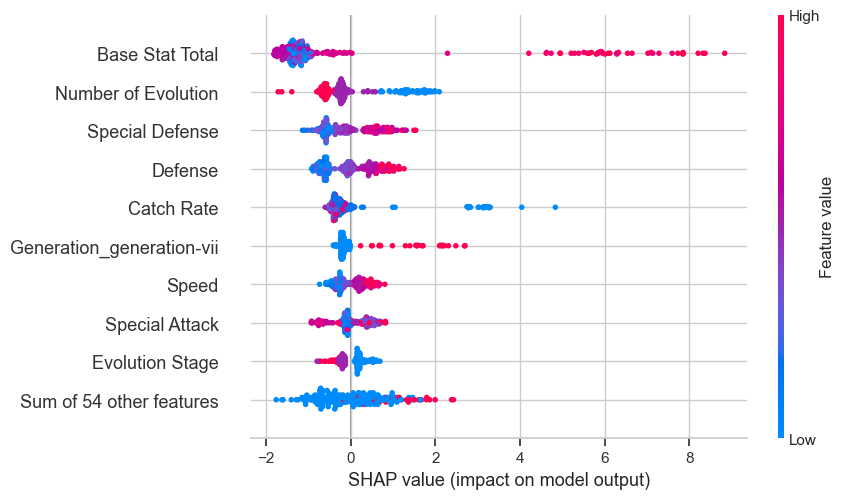

In [115]:
# 2Ô∏è‚É£ Efecto detallado por variable (summary plot)
shap.plots.beeswarm(shap_values, max_display=10)



## üß† Interpretaci√≥n Avanzada de SHAP: Gr√°fico de Dispersi√≥n (Beeswarm)

Este gr√°fico SHAP tipo "beeswarm" muestra c√≥mo las caracter√≠sticas individuales impactan las predicciones del modelo (XGBoost), a nivel de cada muestra en el conjunto de datos.

### ‚úÖ ¬øQu√© representa?

- El eje Y enumera las **caracter√≠sticas m√°s importantes** seg√∫n SHAP.
- Cada punto representa un Pok√©mon, posicionado en el eje X seg√∫n cu√°nto esa caracter√≠stica afect√≥ su predicci√≥n (`SHAP value`).
- El color indica el **valor original de la caracter√≠stica** para esa muestra:
  - üî¥ Rojo = valor alto
  - üîµ Azul = valor bajo

---

### üîç An√°lisis por caracter√≠sticas clave:

1. **`Base Stat Total`**:
   - Valores altos (rojo) empujan fuertemente la predicci√≥n hacia ser legendario (valores SHAP positivos).
   - Valores bajos (azul) contribuyen negativamente, reduciendo la probabilidad de ser legendario.

2. **`Number of Evolution`**:
   - Tener menos evoluciones (valores bajos, azul) se asocia con mayor probabilidad de ser legendario.
   - Muchos Pok√©mon legendarios no evolucionan.

3. **`Special Defense`, `Defense`, `Catch Rate`**:
   - Valores altos tambi√©n empujan la predicci√≥n hacia la clase legendaria.
   - `Catch Rate` bajo (azul) tambi√©n tiene impacto positivo: legendarios son m√°s dif√≠ciles de atrapar.

4. **`Generation_generation-vii`**:
   - En esta generaci√≥n, ciertos valores contribuyen claramente a predicciones positivas.

5. **`Speed`, `Special Attack`, `Evolution Stage`**:
   - Muestran impacto moderado, pero consistente.

---

### üìå Conclusiones:

- Este gr√°fico revela no solo **qu√© variables importan**, sino tambi√©n **c√≥mo y en qu√© direcci√≥n afectan** la predicci√≥n.
- Se puede ver que:
  - Variables como `Base Stat Total` y `Catch Rate` tienen **efectos consistentes y fuertes**.
  - La **codificaci√≥n de generaci√≥n** y estad√≠sticas espec√≠ficas tambi√©n influyen, pero de forma m√°s distribuida.

### üéØ Uso pr√°ctico:

Ideal para explicar decisiones individuales del modelo y justificar por qu√© ciertos Pok√©mon fueron clasificados como legendarios o no.



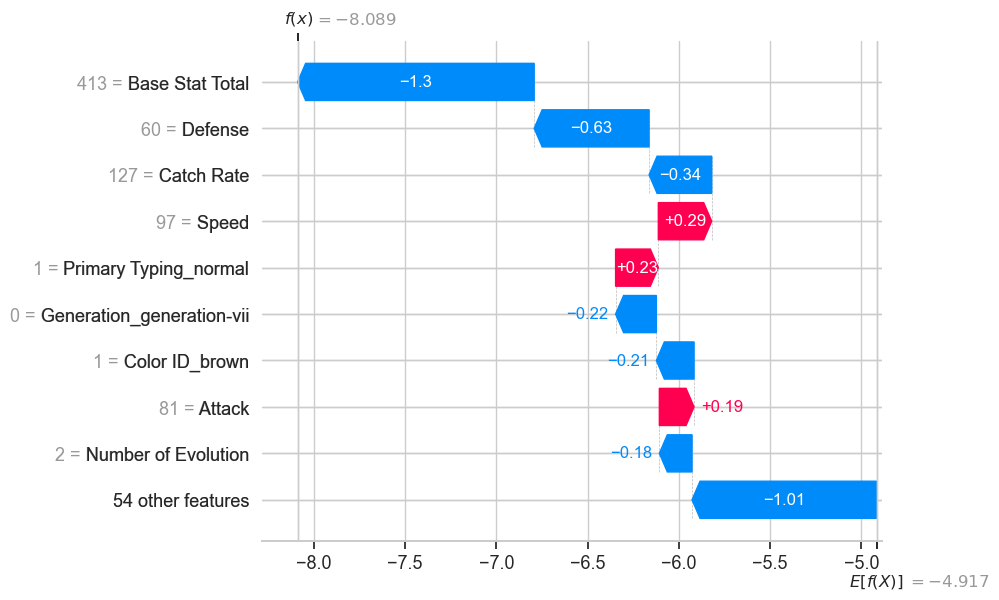

In [116]:
# 3Ô∏è‚É£ Explicaci√≥n individual de una predicci√≥n (elige un √≠ndice)
pokemon_index = 0  # puedes cambiarlo para otros Pok√©mon
shap.plots.waterfall(shap_values[pokemon_index])

## üß† Interpretaci√≥n SHAP Individual: Explicaci√≥n de una Predicci√≥n

Esta gr√°fica tipo *Waterfall* muestra c√≥mo las caracter√≠sticas individuales contribuyen a la predicci√≥n para un **Pok√©mon espec√≠fico**. En este caso, el modelo predijo una probabilidad **muy baja de ser legendario** (f(x) ‚âà -8.09), partiendo del valor promedio del modelo (E[f(x)] ‚âà -4.92).

### ‚úÖ ¬øQu√© representa?

- Cada barra representa una **caracter√≠stica del Pok√©mon**.
- El color:
  - üîµ Azul: contribuye negativamente (reduce la probabilidad de ser legendario).
  - üî¥ Rojo: contribuye positivamente (aumenta la probabilidad).
- Las etiquetas muestran los valores reales de cada feature para este Pok√©mon.

---

### üîç Deducci√≥n del caso:

#### ‚ùå Principales contribuciones negativas:
- `Base Stat Total = 413`: valor bajo ‚Üí gran impacto negativo (‚Äì1.3)
- `Defense = 60` y `Catch Rate = 127`: valores comunes ‚Üí reducen la predicci√≥n
- `Number of Evolution = 2`: muchos legendarios no evolucionan, as√≠ que esto va en contra
- `Typing = normal`, `Color ID = brown`: tambi√©n comunes en Pok√©mon no legendarios

#### ‚úÖ Contribuciones positivas menores:
- `Speed = 97`, `Attack = 81`: aunque no son altos, suman levemente
- Algunas codificaciones categ√≥ricas (`Primary Typing_normal`, `Generation_vii`) tienen efectos positivos peque√±os

---

### üìå Conclusi√≥n:

Este Pok√©mon fue **clasificado como no legendario** principalmente porque:
- Tiene un **total de estad√≠sticas bajo**
- Presenta **caracter√≠sticas comunes en Pok√©mon est√°ndar**: muchos niveles de evoluci√≥n, tipo normal, color marr√≥n
- Tiene estad√≠sticas de defensa y ataque moderadas pero no suficientes para revertir la predicci√≥n

Este an√°lisis demuestra c√≥mo el modelo toma decisiones **explicables y coherentes con la l√≥gica del juego**, lo cual es ideal para justificar predicciones ante usuarios o stakeholders.



---
# Validacion Cruzada Estratificada con XGBoost


In [117]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier

# Usamos el modelo ya optimizado
xgb_final = best_xgb

In [118]:
# Configuramos validaci√≥n cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# M√©tricas que vamos a evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [119]:
# Ejecutamos validaci√≥n cruzada
cv_results = cross_validate(
    xgb_final,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

In [120]:
# Mostramos resultados promedios y desviaciones
import pandas as pd
cv_summary = pd.DataFrame({
    metric: [cv_results[f'test_{metric}'].mean(), cv_results[f'test_{metric}'].std()]
    for metric in scoring
}, index=["Media", "Desviaci√≥n est√°ndar"])

print("Resumen de validaci√≥n cruzada (5-fold):")
cv_summary.T

Resumen de validaci√≥n cruzada (5-fold):


Media  Desviaci√≥n est√°ndar
accuracy   0.974662             0.002669
precision  0.938260             0.019217
recall     0.908974             0.020858
f1         0.923019             0.008286
roc_auc    0.981249             0.008380

## Conclusiones:

- Baja variabilidad entre folds: tu modelo no est√° sobreajustado a un subconjunto espec√≠fico.
- Precisi√≥n y recall bien balanceados: excelente para un problema con clases desbalanceadas.
- ROC AUC cercano a 1: el modelo distingue muy bien entre Pok√©mon legendarios y no legendarios en distintos subconjuntos.

---
# Analisis de Errores 

In [121]:
import pandas as pd

# Hacemos predicciones con el mejor modelo
y_pred_final = best_xgb.predict(X_test)
y_proba_final = best_xgb.predict_proba(X_test)[:, 1]


In [122]:
# Creamos un DataFrame con resultados
error_df = X_test.copy()
error_df["Probabilidad"] = y_proba_final
error_df["Predicci√≥n"] = y_pred_final
error_df["Real"] = y_test.values
error_df["Error"] = error_df["Predicci√≥n"] != error_df["Real"]

In [127]:
# Identificamos falsos positivos y falsos negativos
fp_df = error_df[(error_df["Predicci√≥n"] == 1) & (error_df["Real"] == 0)]
fn_df = error_df[(error_df["Predicci√≥n"] == 0) & (error_df["Real"] == 1)]


In [128]:
# Mostramos ejemplos
print("‚ùå Falsos Positivos (Predijo legendario, pero no lo era):")
fp_df.head()

‚ùå Falsos Positivos (Predijo legendario, pero no lo era):


Secondary Typing Flag  Evolution Stage  Number of Evolution  Catch Rate  \
831                    True                3                    3          45   
780                    True                3                    3          45   
1174                   True                2                    2          10   

      Base Stat Total  Health  Attack  Defense  Special Attack  \
831               600      80     100      100             110   
780               640      72     145       67             153   
1174              600      90     105      130             125   

      Special Defense  ...  Color ID_green  Color ID_pink  Color ID_purple  \
831               150  ...             0.0            0.0              1.0   
780                71  ...             0.0            0.0              0.0   
1174               65  ...             0.0            0.0              0.0   

      Color ID_red  Color ID_white  Color ID_yellow  Probabilidad  Predicci√≥n  \
831            0.0             0.0              0.0      0.507329           1   
780            0.0             0.0              0.0      0.943741           1   
1174           0.0             1.0              0.0      0.948610           1   

      Real  Error  
831      0   True  
780      0   True  
1174     0   True  

[3 rows x 67 columns]

In [125]:
print("\n‚ùå Falsos Negativos (Predijo NO legendario, pero s√≠ lo era):")
fn_df.head()


‚ùå Falsos Negativos (Predijo NO legendario, pero s√≠ lo era):


Secondary Typing Flag  Evolution Stage  Number of Evolution  Catch Rate  \
19                     True                3                    3          45   
568                    True                2                    2          30   
1039                  False                1                    2           3   
594                   False                1                    2          30   

      Base Stat Total  Health  Attack  Defense  Special Attack  \
19                495      65     150       40              15   
568               515      86      76       86             116   
1039              385      60      90       60              53   
594               480      80      80       80              80   

      Special Defense  ...  Color ID_green  Color ID_pink  Color ID_purple  \
19                 80  ...             0.0            0.0              0.0   
568                56  ...             1.0            0.0              0.0   
1039               50  ...             0.0            0.0              0.0   
594                80  ...             0.0            0.0              0.0   

      Color ID_red  Color ID_white  Color ID_yellow  Probabilidad  Predicci√≥n  \
19             0.0             0.0              1.0      0.000201           0   
568            0.0             0.0              0.0      0.002584           0   
1039           0.0             0.0              0.0      0.124278           0   
594            0.0             0.0              0.0      0.002452           0   

      Real  Error  
19       1   True  
568      1   True  
1039     1   True  
594      1   True  

[4 rows x 67 columns]

## Pruebas adicionales

Porque fue clasificado como no legendario

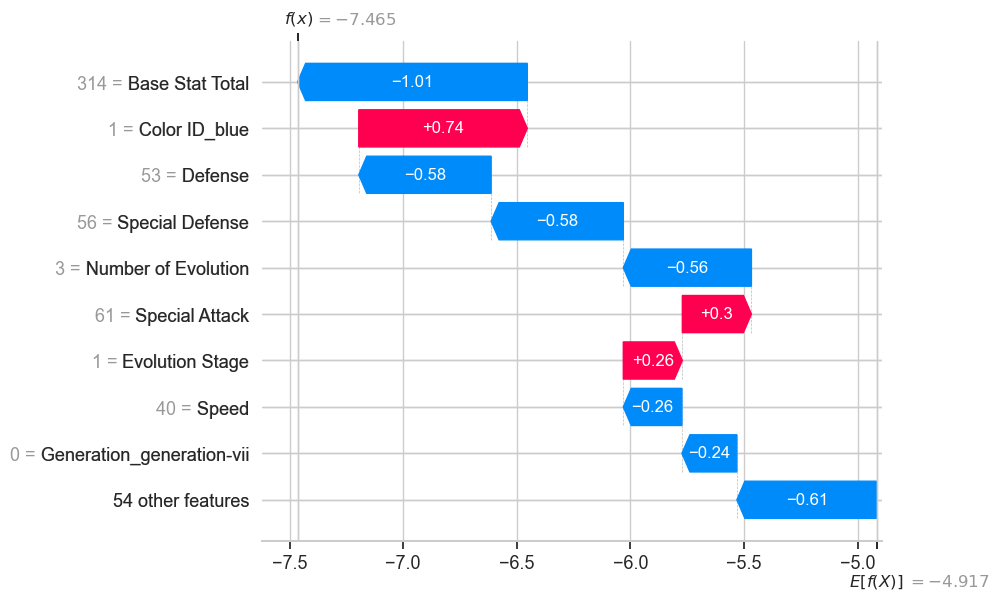

In [129]:
# SHAP para el falso negativo con √≠ndice 19
pokemon_index = 19  # este √≠ndice debe coincidir con X_test row

# Verifica si es correcto. Si no, usa fn_df.index[0] en su lugar.
shap.plots.waterfall(shap_values[pokemon_index])

Por que predijo que era legendario

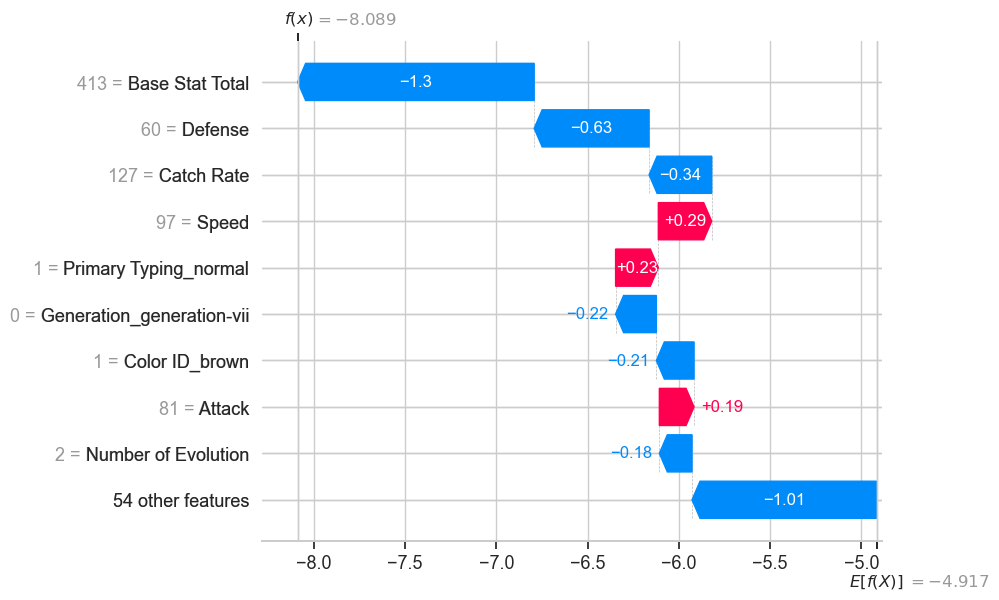

In [133]:
shap.plots.waterfall(shap_values[0])


## Conclusi√≥n del caso

- El modelo sobrevalor√≥ factores secundarios como velocidad y tipo, que le sumaron a la predicci√≥n.
- Aunque la mayor√≠a de los factores (estad√≠sticas, captura, evoluci√≥n) deber√≠an haber llevado al modelo a rechazar la predicci√≥n legendaria, la suma de peque√±os aportes positivos fue suficiente para superar el umbral.



---
# Guardar los modelos

In [137]:
import joblib
import os

models_dir = "models/"

os.makedirs(models_dir, exist_ok=True)

# Guardar todos los modelos
joblib.dump(logreg, os.path.join(models_dir, "logistic_regression_model.pkl"))
joblib.dump(rf, os.path.join(models_dir, "random_forest_model.pkl"))
joblib.dump(xgb, os.path.join(models_dir, "xgboost_model.pkl"))
joblib.dump(best_xgb, os.path.join(models_dir, "best_xgboost_model.pkl"))

# Confirmar los archivos guardados
os.listdir(models_dir)


['best_xgboost_model.pkl',
 'logistic_regression_model.pkl',
 'random_forest_model.pkl',
 'xgboost_model.pkl']